In [67]:
# Imports

import pandas as pd
import numpy as np
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Import the data

train = pd.read_csv('train.csv', encoding='latin')

In [69]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [34]:
train.isnull().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [70]:
train.dropna(inplace=True)

In [71]:
train.isnull().sum()

tweet_id     0
tweet        0
sentiment    0
dtype: int64

In [61]:
# Delete ItemID

#train.drop('ItemID', axis=1, inplace=True)

In [39]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [72]:
import re
from string import punctuation

In [73]:
train['tweet']

0       #sxswnui #sxsw #apple defining language of tou...
1       Learning ab Google doodles! All doodles should...
2       one of the most in-your-face ex. of stealing t...
3       This iPhone #SXSW app would b pretty awesome i...
4       Line outside the Apple store in Austin waiting...
                              ...                        
7269    @mention Google plze Tammi.  I'm in middle of ...
7270    RT @mention ÂÃ·Â¼ Are you all set? ÂÃ·_ {lin...
7271    RT @mention Aha! Found proof of lactation room...
7272    We just launched our iPad app at #SXSW! Get al...
7273    The next fin serv battle is vs Apple, GOOG, Mo...
Name: tweet, Length: 7273, dtype: object

In [42]:
all_sentiments1 = '\n'.join(train['tweet'])

In [19]:
all_sentiments1

"#sxswnui #sxsw #apple defining language of touch with different dialects becoming smaller\nLearning ab Google doodles! All doodles should be light, funny &amp; innovative, with exceptions for significant occasions. #GoogleDoodle #sxsw\none of the most in-your-face ex. of stealing the show in yrs RT @mention &quot;At #SXSW, Apple schools the mkt experts&quot;  {link}\nThis iPhone #SXSW app would b pretty awesome if it didn't crash every 10mins during extended browsing. #Fuckit #Illmakeitwork\nLine outside the Apple store in Austin waiting for the new iPad #SXSW  {link}\n#technews One lone dude awaits iPad 2 at AppleÂ\x89Ã\x9bÂªs SXSW store {link} #Tech_News #Apple #iPad_2 #SXSW #tablets #tech\nSXSW Tips, Prince, NPR Videos, Toy Shopping With Zuckerberg.\r\n{link}  #sxsw  #ipad\nNU user RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by #Mashable\nFree #SXSW sampler on iTunes {link} #FreeMusic\nI think I might go all weekend without see

In [74]:


def performCleansingForSentimentalAnalysisWithStopWords(completeText):
#     print('##### Get Tokens in Lower Case #######')
#     #Get tokens in lower case
#     lowercasetokens = getUniqueTokens(completeText.lower())
#     unique_lowercase_tokens = len(set(lowercasetokens))
#     print('Lowercase Unique Tokens are ' + format(unique_lowercase_tokens))
#     print('##### Applying  stemming #######')
#     #Applying the stemming
#     unique_lowercase_tokens_stemmed= stemData(lowercasetokens)
#     len_unique_lowercase_tokens_stemmed = len(unique_lowercase_tokens_stemmed)
#     print('Lowercase Unique Tokens after steming  ' + format(len_unique_lowercase_tokens_stemmed))
#     print('##### Applying stop words + removing Hashtags + mentions + Links + Short Links +  #######')
 #   hashtags = find_hashtags(lowercompleteText)
 #    mentions = find_mentions(lowercompleteText)
 #   links = find_links(lowercompleteText)
#    numbers = find_numbers(lowercompleteText)
#    emojis = find_emojis(lowercompleteText)
#    punctuations = list(punctuation)
#     unique_lowercase_tokens_stemmed_without_stopwords = removeCustomStopWords(lowercompleteText,hashtags,mentions,links,numbers,emojis,punctuations)
#     return unique_lowercase_tokens_stemmed_without_stopwords
    lowercompleteText = completeText.lower()
    import re
    hastag_pat = r'#[0-9a-z_]+'
    mentions_pat = r'\@[0-9a-z]+'
    number_pat = r'-?\d+\.?\d+|-?\d+'
    links_pat= r'http://\S+|https://\S+'
    punctuations_pat= r'[.!?\\-]'
    #short_links_pat =
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    def remove_hashtags(tweet):
        return re.sub(hastag_pat, '', tweet)
    def remove_mentions(tweet):
        return re.sub(mentions_pat, '', tweet)
    def remove_numbers(tweet):
        return re.sub(number_pat, '',tweet)
    def remove_links(tweet):
        return re.sub(links_pat, '', tweet)
    def remove_emojis(tweet):
        return re.sub(emoji_pattern, '', tweet)
    def remove_shortLinks(tweet):
        return re.sub(short_links_pat, '', tweet)
    def remove_punctuations(tweet):
        return re.sub(punctuations_pat, '', tweet)
    def find_hashtags(tweet):
        return re.findall(hastag_pat, tweet)
    def find_mentions(tweet):
        return re.findall(mentions_pat, tweet, flags=re.I)
    def find_links(tweet):
        return re.findall(links_pat, tweet, flags=re.I)
    def find_numbers(tweet):
        return re.findall(number_pat, tweet)
    def find_emojis(tweet):
        return re.findall(emoji_pattern, tweet)
    
          
    lowercompleteText = remove_hashtags(lowercompleteText)
    lowercompleteText = remove_mentions(lowercompleteText)
    lowercompleteText = remove_numbers(lowercompleteText)
    lowercompleteText = remove_links(lowercompleteText)
    lowercompleteText = remove_emojis(lowercompleteText)
    lowercompleteText = remove_punctuations(lowercompleteText)
  #  lowercompleteText = getstemData(lowercompleteText)
    return  lowercompleteText

In [75]:
train['tweet'] = train['tweet'].apply(lambda x:performCleansingForSentimentalAnalysisWithStopWords(x))

In [22]:
train['tweet']

0          defining language of touch with different d...
1       learning ab google doodles all doodles should ...
2       one of the most inyourface ex of stealing the ...
3       this iphone  app would b pretty awesome if it ...
4       line outside the apple store in austin waiting...
                              ...                        
7269     google plze tammi  i'm in middle of  crazines...
7270    rt  âã·â¼ are you all set âã·_ {link} âã·_ ...
7271    rt  aha found proof of lactation room, excuse ...
7272    we just launched our ipad app at  get all the ...
7273    the next fin serv battle is vs apple, goog, mo...
Name: tweet, Length: 7273, dtype: object

In [45]:
all_sentiments = '\n'.join(train['tweet'])

In [46]:
all_sentiments

"   defining language of touch with different dialects becoming smaller\nlearning ab google doodles all doodles should be light, funny &amp; innovative, with exceptions for significant occasions  \none of the most inyourface ex of stealing the show in yrs rt  &quot;at , apple schools the mkt experts&quot;  {link}\nthis iphone  app would b pretty awesome if it didn't crash every mins during extended browsing  \nline outside the apple store in austin waiting for the new ipad   {link}\n one lone dude awaits ipad  at appleâ\x89ã\x9bâªs sxsw store {link}      \nsxsw tips, prince, npr videos, toy shopping with zuckerberg\r\n{link}    \nnu user rt  new  for  now in the app store includes uberguide to  sponsored by \nfree  sampler on itunes {link} \ni think i might go all weekend without seeing the same ipad case twice \nrt  official  app â\x89ã\x9bã·sxsw goâ\x89ã\x9bâª bitly/hmiiga   \nit's official i'm buying an ipad  \nthey're giving away ipad 's, x boxes and books at   \nrt  we're official

In [8]:
all_sentiments[:50]

'                     is so sad for my APL friend..'

In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\viren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
#from nltk.corpus import stopwords
import nltk

from string import punctuation
from nltk.stem.porter import *
punc = list(punctuation)+['``', "'s", "...", "n't"]

# tokenize
train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tweet']]


In [77]:
train['tokenized_text'] = train['tokenized_text'].apply(lambda row: [word for word in row if word not in punc])

#train['tweet'] = train['tweet'].apply(lambda row: [word for word in row if word not in punc])

In [78]:
train['tokenized_text']

0       [defining, language, of, touch, with, differen...
1       [learning, ab, google, doodles, all, doodles, ...
2       [one, of, the, most, inyourface, ex, of, steal...
3       [this, iphone, app, would, b, pretty, awesome,...
4       [line, outside, the, apple, store, in, austin,...
                              ...                        
7269    [google, plze, tammi, i, 'm, in, middle, of, c...
7270    [rt, âã·â¼, are, you, all, set, âã·_, link, ...
7271    [rt, aha, found, proof, of, lactation, room, e...
7272    [we, just, launched, our, ipad, app, at, get, ...
7273    [the, next, fin, serv, battle, is, vs, apple, ...
Name: tokenized_text, Length: 7273, dtype: object

In [88]:
stemmer = PorterStemmer()

train['tokenized_text'] = train['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
train['tokenized_text'] = train['tokenized_text'].apply(lambda x: ' '.join(x))


In [89]:
train['tokenized_text']

0       defin languag of touch with differ dialect bec...
1       learn ab googl doodl all doodl should be light...
2       one of the most inyourfac ex of steal the show...
3       thi iphon app would b pretti awesom if it did ...
4       line outsid the appl store in austin wait for ...
                              ...                        
7269    googl plze tammi i 'm in middl of crazi and ev...
7270           rt âã·â¼ are you all set âã·_ link âã·_
7271    rt aha found proof of lactat room excu me quot...
7272    we just launch our ipad app at get all the det...
7273    the next fin serv battl is vs appl goog mobil ...
Name: tokenized_text, Length: 7273, dtype: object

In [51]:
all_words ='\n'.join([str(text) for text in train['tokenized_text']])
all_words
#all_words = '\n'.join(train['tokenized_text'])

'[\'defining\', \'language\', \'of\', \'touch\', \'with\', \'different\', \'dialects\', \'becoming\', \'smaller\']\n[\'learning\', \'ab\', \'google\', \'doodles\', \'all\', \'doodles\', \'should\', \'be\', \'light\', \'funny\', \'amp\', \'innovative\', \'with\', \'exceptions\', \'for\', \'significant\', \'occasions\']\n[\'one\', \'of\', \'the\', \'most\', \'inyourface\', \'ex\', \'of\', \'stealing\', \'the\', \'show\', \'in\', \'yrs\', \'rt\', \'quot\', \'at\', \'apple\', \'schools\', \'the\', \'mkt\', \'experts\', \'quot\', \'link\']\n[\'this\', \'iphone\', \'app\', \'would\', \'b\', \'pretty\', \'awesome\', \'if\', \'it\', \'did\', \'crash\', \'every\', \'mins\', \'during\', \'extended\', \'browsing\']\n[\'line\', \'outside\', \'the\', \'apple\', \'store\', \'in\', \'austin\', \'waiting\', \'for\', \'the\', \'new\', \'ipad\', \'link\']\n[\'one\', \'lone\', \'dude\', \'awaits\', \'ipad\', \'at\', \'appleâ\\x89ã\\x9bâªs\', \'sxsw\', \'store\', \'link\']\n[\'sxsw\', \'tips\', \'prince\'

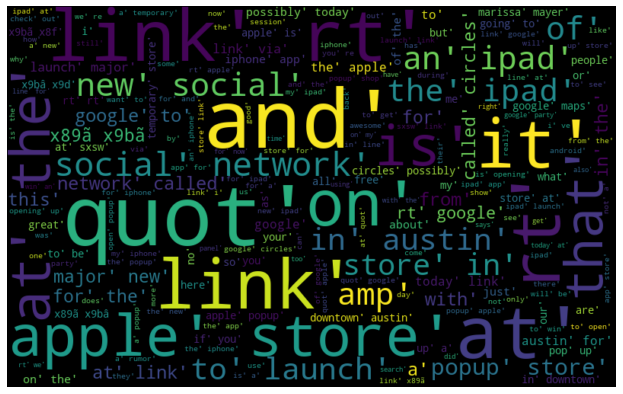

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# all the tweets

# generate wordcloud object
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# plot wordcloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [9]:
#tok = TreebankWordTokenizer()

In [10]:
# Find unique tokens

#unique_tokens = len(set(tok.tokenize(all_sentiments)))

#print(f'Unique unprocessed tokens - {unique_tokens}')

Unique unprocessed tokens - 141894


In [11]:
# Unique lower cased tokens

#unique_lower_case = [t.lower() for t in tok.tokenize(all_sentiments)]
#unique_lc_count = len(set(unique_lower_case))

#print(f'Unique lower case unprocessed tokens - {unique_lc_count}')

Unique lower case unprocessed tokens - 125465


In [12]:
#ps = PorterStemmer()

In [13]:
# Unique lower cased stemmed tokens

#unique_lc_stemmed = [ps.stem(t) for t in unique_lower_case]
#unique_lc_stem_count = len(set(unique_lc_stemmed))

#print(f'Unique lower case stemmed tokens - {unique_lc_stem_count}')

Unique lower case stemmed tokens - 115381


In [17]:

# Load stop words

#stw = stopwords.words('english')

In [18]:
# Unique lower cased stemmed w/o stop wordstokens

#unique_lc_stem_wo_stpwrds = [t for t in unique_lc_stemmed if t not in stw]
#unique_lc_stem_wo_stw_count = len(set(unique_lc_stem_wo_stpwrds))

#print(f'Unique lower case stemmed tokens without stop words - {unique_lc_stem_wo_stw_count}')

Unique lower case stemmed tokens without stop words - 115254


In [21]:
# Create a word cloud

#wc = WordCloud(stopwords=stw, background_color='white', max_words=500).generate(all_sentiments.lower())

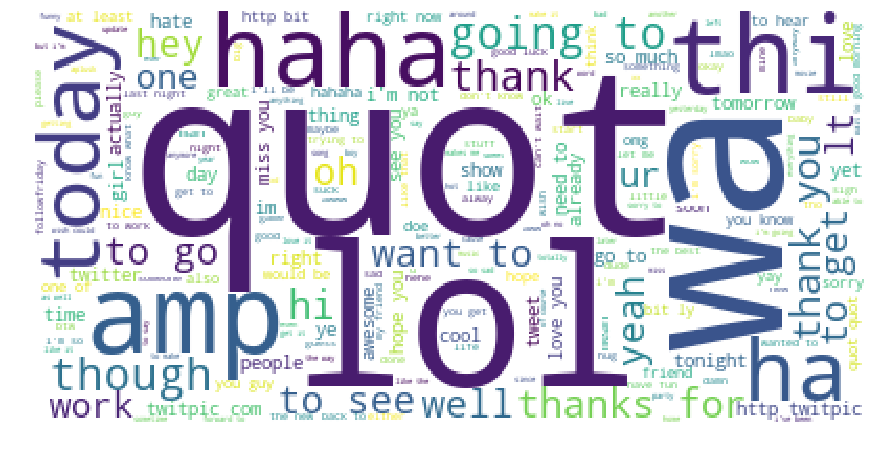

In [22]:
#%matplotlib inline
#plt.figure(figsize=(15, 10))
#plt.clf()
#plt.imshow(wc)
#plt.axis('off')
#plt.show()

## Sentiment Analysis

In [90]:
# Sentiment Analysis imports

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

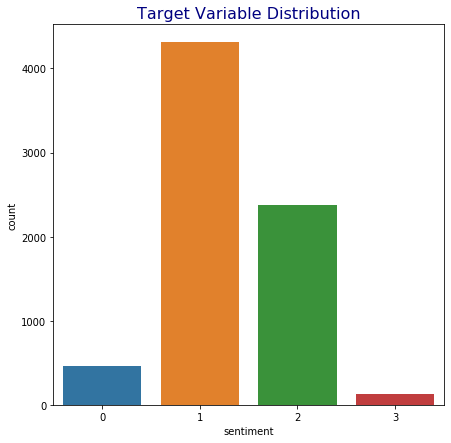

In [91]:
# Sentiment categories

plt.figure(figsize=(7, 7))
sns.countplot(train['sentiment'])
plt.title('Target Variable Distribution', fontsize=16, color='navy')
plt.show()

In [108]:
# Create X and Y
#train['tokenized_text'] = [nltk.word_tokenize(x) for x in train['tokenized_text']]

X = train['tokenized_text']
y = train['sentiment']

In [109]:
X.head()

0    defin languag of touch with differ dialect bec...
1    learn ab googl doodl all doodl should be light...
2    one of the most inyourfac ex of steal the show...
3    thi iphon app would b pretti awesom if it did ...
4    line outsid the appl store in austin wait for ...
Name: tokenized_text, dtype: object

In [110]:
y.head()

0    1
1    1
2    2
3    0
4    1
Name: sentiment, dtype: int64

In [95]:
# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=10)

In [96]:
X_train

6508                      googl map for mobil look awesom
345     ellen page appear reduc to iphon call heart br...
5463             watch demo of googl hotpot peopl use thi
5441    a delight repriev from i spot someth plug in n...
5585    rt hi if you accid took my ipad from the set w...
                              ...                        
1180    rt wan na know where the fast cellular signal ...
3442    did googl just buy foursquar quot i do knowtha...
1345    alreadi pay dividend discov a coupl of cool ap...
4624    at the googl blogger/sketchup parti with it un...
1290    interest gt gt rt googl to launch major new so...
Name: tokenized_text, Length: 5818, dtype: object

In [98]:
#cv = CountVectorizer()

In [99]:
#X_train_vec = cv.fit_transform(X_train)

In [45]:
# Creating count vectorizer from training data



AttributeError: 'list' object has no attribute 'lower'

In [103]:
# Instantiate all the models

rf = RandomForestClassifier()
lr = LogisticRegression()
gb = GradientBoostingClassifier()

In [102]:
# Convert my test data into vectors for prediction

X_test_vec = cv.transform(X_test)

In [104]:
# Train the models and check CLF report



for model, name in zip([rf, lr, gb], ['Random Forest', 'Logistic Regression', 'Gradient Boosting']):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))

TypeError: float() argument must be a string or a number, not 'CountVectorizer'

In [111]:
tf = TfidfVectorizer()

In [112]:
X_train_vec_tf = tf.fit_transform(X_train)
X_test_vec_tf = tf.transform(X_test)

In [113]:
# Train the models and check CLF report for TFIDF vectorizer

for model, name in zip([rf, lr, gb], ['Random Forest', 'Logistic Regression', 'Gradient Boosting']):
    model.fit(X_train_vec_tf, y_train)
    y_pred = model.predict(X_test_vec_tf)
    print(f'CLF report for {name}')
    print(classification_report(y_test, y_pred))

CLF report for Random Forest
              precision    recall  f1-score   support

           0       0.63      0.20      0.30        85
           1       0.69      0.88      0.77       882
           2       0.65      0.42      0.51       465
           3       0.00      0.00      0.00        23

    accuracy                           0.68      1455
   macro avg       0.49      0.37      0.40      1455
weighted avg       0.66      0.68      0.65      1455



C:\Users\viren\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\viren\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


CLF report for Logistic Regression
              precision    recall  f1-score   support

           0       0.71      0.06      0.11        85
           1       0.70      0.85      0.77       882
           2       0.58      0.48      0.52       465
           3       0.00      0.00      0.00        23

    accuracy                           0.67      1455
   macro avg       0.50      0.35      0.35      1455
weighted avg       0.65      0.67      0.64      1455

CLF report for Gradient Boosting
              precision    recall  f1-score   support

           0       0.47      0.09      0.16        85
           1       0.68      0.89      0.77       882
           2       0.62      0.35      0.45       465
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.44      0.33      0.34      1455
weighted avg       0.64      0.66      0.62      1455



## Cleaning with RE

,Sentiment,SentimentText,clean_text
0,0,is so sad for my APL frie...,None
1,0,I missed the New Moon trail...,None
2,1,omg its already 7:30 :O,None
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,None
4,0,i think mi bf is cheating on me!!! ...,None


['@electrograffiti']

'I am  years old'

**List of unwanted items**
1. Hashtags (#)
2. Mentions (@)
3. Links (http://, https://)
4. Short link (t.co, bit.ly)
5. Numbers
6. Emojis
7. Emoticons
8. Punctuations